<center>
<h4>Universidad Nacional de Córdoba - Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h4>
<h3> Análisis y Visualización de Datos </h3>
<h4> Practico de Mentoria</h4>
</center>


In [ ]:
# https://github.com/diplodatos2020/Introduccion_Mentoria/blob/master/dataset_inf_telec.csv
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(15, 5)})
filename = "https://raw.githubusercontent.com/diplodatos2020/Introduccion_Mentoria/master/dataset_inf_telec.csv"
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [ ]:
df = pd.read_csv(
    filename,
    dtype={
        'ID_EQUIPO': int,
        'PUNTO_MEDICION': str,
        'CAPACIDAD_MAXIMA_GBS': float,
        'PASO': int,
        'LATENCIA_MS': float,
        'PORCENTAJE_PACK_LOSS': float,
        'INBOUND_GBPS': np.float64,
        'OUTBOUND_GBPS': np.float64,
    },
    parse_dates=[
        'FECHA_INICIO_MEDICION',
        'FECHA_FIN_MEDICION',
        'FECHA_HORA',
    ],
)


Análisis General

*Consigna*

    ¿Cuántas features posee el dataset?¿Que representa cada una?

In [ ]:
features = df.columns.to_numpy()
print(f"Las features del dataset son {len(features)}:",)
for feat in features:
  print("- ",feat)


Las features del dataset son 11:
-  ID_EQUIPO
-  PUNTO_MEDICION
-  CAPACIDAD_MAXIMA_GBS
-  FECHA_INICIO_MEDICION
-  FECHA_HORA
-  FECHA_FIN_MEDICION
-  PASO
-  LATENCIA_MS
-  PORCENTAJE_PACK_LOSS
-  INBOUND_GBPS
-  OUTBOUND_GBPS


- ID_EQUIPO identifica el equipo sobre el cual se realizo la medicion.
- PUNTO_MEDICION indica a que troncal estaba conectado dicho equipo.
- CAPACIDAD_MAXIMA_GBS es la capacidad total de transmision del equipo.
- FECHA_INICIO_MEDICION es el momento en que se comenzo a registrar el trafico.
- FECHA_HORA momento en que se registran las variables instantaneas, como la latencia.
- FECHA_FIN_MEDICION la fecha en la cual se termino de registrar el trafico.
- PASO Por ahora no se utilizara esta feature.
- LATENCIA_MS es lo que tarda en llegar la informacion desde el equipo hasta el prestador de servicios. Esta expresado en milisegundos.
- PORCENTAJE_PACK_LOSS es el porcentaje de datos o informacion perdida durante la transmision. Esta expresado en porcentaje de 100.
- INBOUND_GBPS es la tasa de transferencia hacia el equipo. Su unidad de medida es GigaBits por segundo.
- OUTBOUND_GBPS es la tasa de transferencia desde el equipo. Su unidad es GigaBits por segundo.

**Análisis Estadístico**

*Consigna*
- ¿Cuáles son las variables númericas?

In [ ]:
df.dtypes

ID_EQUIPO                         int64
PUNTO_MEDICION                   object
CAPACIDAD_MAXIMA_GBS            float64
FECHA_INICIO_MEDICION    datetime64[ns]
FECHA_HORA               datetime64[ns]
FECHA_FIN_MEDICION       datetime64[ns]
PASO                              int64
LATENCIA_MS                     float64
PORCENTAJE_PACK_LOSS            float64
INBOUND_GBPS                    float64
OUTBOUND_GBPS                   float64
dtype: object

Las variables numericas son:
- ID_EQUIPO
- CAPACIDAD_MAXIMA_GBS
- PASO
- LATENCIA_MS
- PORCENTAJE_PACK_LOSS
- INBOUND_GBPS
- OUTBOUND_GBPS

Tambien, si convertimos las fechas a nanosegundos, tenemos
- FECHA_INICIO_MEDICION    
- FECHA_HORA
- FECHA_FIN_MEDICION

*Consigna*
- Calcular los siguentes estadisticos de la feature CAPACIDAD_MAXIMA_GBS:
    - Moda
    - Media
    - Mediana
    - Desviacion Estandar
    - Minimo y Maximo

In [ ]:
maxGb = df.CAPACIDAD_MAXIMA_GBS
maxGb.value_counts()
max_val = maxGb.value_counts().index.to_numpy()[0]
max_val

1.0

In [ ]:
mean = maxGb.mean()
median = maxGb.median()
desv = maxGb.std()
max = maxGb.max()
min = maxGb.min()
print("""
    CAPACIDAD_MAXIMA_GBS
    Moda:         %.2f
    Media:        %.2f
    Mediana:      %.2f
    Desviación Estándar: %.2f
    Valor Máximo: %2.f
    Valor Minimo: %.3f
""" % (max_val,mean,median,desv,max,min))


    CAPACIDAD_MAXIMA_GBS
    Moda:         1.00
    Media:        6.21
    Mediana:      1.00
    Desviación Estándar: 8.26
    Valor Máximo: 40
    Valor Minimo: 0.027



In [ ]:
maxGb.describe().T

count    16128.000000
mean         6.211654
std          8.264077
min          0.027263
25%          1.000000
50%          1.000000
75%         10.000000
max         40.000000
Name: CAPACIDAD_MAXIMA_GBS, dtype: float64

*Consigna*
- Seleccionar al menos 2 features del dataset:
  - ¿Existen outliers para estas features?
  - ¿Hay valores faltantes?
  - ¿Hay valores negativos?
  - ¿Que decisión tomarían para completar o eliminar estos outliers y faltantes?


**Forma para identificar:**


usando 2.5 * desvios estandar de la media



Primera feature elegida "CAPACIDAD_MAXIMA_GBS"

In [ ]:
def clean_outliers(df, column_name):
    interesting_col = df[column_name]
    mask_score_outlier = (
        np.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return df[mask_score_outlier]

clean_data = clean_outliers(df, "CAPACIDAD_MAXIMA_GBS")
print("Se encontraron", len(df) - len(clean_data), "outliers en un total de", len(df), "valores.")
print("CAPACIDAD_MAXIMA_GBS máxima original:\t", df.CAPACIDAD_MAXIMA_GBS.max())
print("CAPACIDAD_MAXIMA_GBS máxima acotada:\t", clean_data.CAPACIDAD_MAXIMA_GBS.max())
print("CAPACIDAD_MAXIMA_GBS minima original:\t", df.CAPACIDAD_MAXIMA_GBS.min())
print("CAPACIDAD_MAXIMA_GBS minima acotada:\t", clean_data.CAPACIDAD_MAXIMA_GBS.min())

Se encontraron 672 outliers en un total de 16128 valores.
CAPACIDAD_MAXIMA_GBS máxima original:	 40.0
CAPACIDAD_MAXIMA_GBS máxima acotada:	 20.0
CAPACIDAD_MAXIMA_GBS minima original:	 0.027263
CAPACIDAD_MAXIMA_GBS minima acotada:	 0.027263


In [ ]:
print("CAPACIDAD_MAXIMA_GBS tiene valores nulos?", df.CAPACIDAD_MAXIMA_GBS.lt(0).any())
print("CAPACIDAD_MAXIMA_GBS tiene valores negativos?", df.CAPACIDAD_MAXIMA_GBS.lt(0).any())

CAPACIDAD_MAXIMA_GBS tiene valores nulos? False
CAPACIDAD_MAXIMA_GBS tiene valores negativos? False


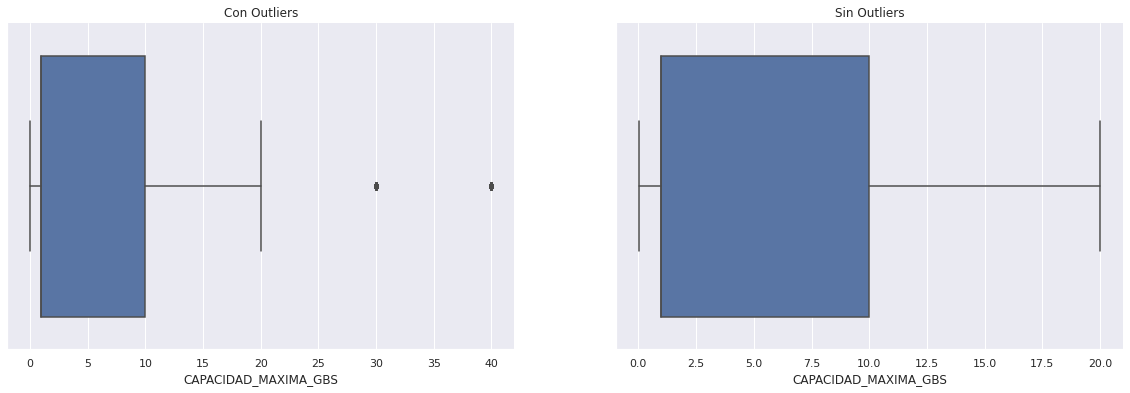

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.boxplot(data=df,
              x='CAPACIDAD_MAXIMA_GBS', )
plt.title("Con Outliers")
sns.despine()
plt.subplot(1,2,2)
plt.title("Sin Outliers")
sns.boxplot(data=clean_data,
                x='CAPACIDAD_MAXIMA_GBS')
sns.despine()

Vemos que hay 672 equipos que tienen una capacidad muy superior que el resto, llegando al doble. Estos equipos se podrian hacer igual a la moda (1), si se quiere homogeneizar los datos.

Segunda feature elegida "PORCENTAJE_PACK_LOSS"

In [ ]:
def clean_outliers_2(df, column_name):
    interesting_col = df[column_name]
    mask_score_outlier = (
        np.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return df[mask_score_outlier]

clean_data = clean_outliers(df, "PORCENTAJE_PACK_LOSS")
print("Se encontraron", len(df) - len(clean_data), "outliers en un total de", len(df), "valores.")
print("PORCENTAJE máxima original:\t", df.PORCENTAJE_PACK_LOSS.max())
print("PORCENTAJE máxima acotada:\t", clean_data.PORCENTAJE_PACK_LOSS.max())
print("PORCENTAJE minima original:\t", df.PORCENTAJE_PACK_LOSS.min())
print("PORCENTAJE minima acotada:\t", clean_data.PORCENTAJE_PACK_LOSS.min())

Se encontraron 93 outliers en un total de 16128 valores.
PORCENTAJE máxima original:	 58.28972430108815
PORCENTAJE máxima acotada:	 6.234502252455613
PORCENTAJE minima original:	 0.0
PORCENTAJE minima acotada:	 0.0


In [ ]:
print("Hay valores negativos?", df.PORCENTAJE_PACK_LOSS.lt(0).any())
print("Hay valores nulos?", df.PORCENTAJE_PACK_LOSS.isnull().any())

Hay valores negativos? False
Hay valores nulos? True


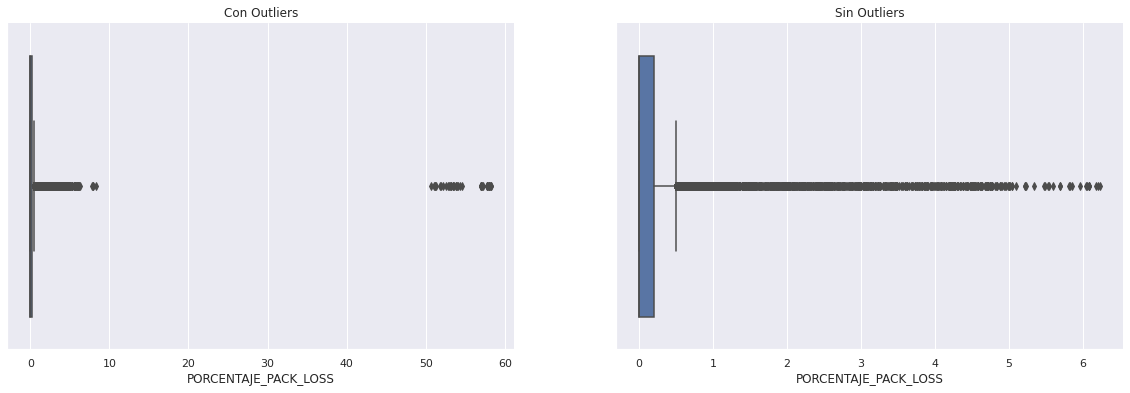

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.boxplot(data=df,
              x='PORCENTAJE_PACK_LOSS', )
plt.title("Con Outliers")
sns.despine()
plt.subplot(1,2,2)
plt.title("Sin Outliers")
sns.boxplot(data=clean_data,
                x='PORCENTAJE_PACK_LOSS')
sns.despine()

Antes de elminiar los Outliers apreciamos claramente dos grupos de valores. Se nos habia informado previamente que un porcentaje demasiado alto de packet loss significaba un problema en la linea, una interrupcion del servicio.

En el caso de querer eliminarlos, con hacerlos igual a 0 seria suficiente.

No es raro encontrar valores nulos en esta metrica, asi que se dejaran sin modificacion.

*Consigna*

- ¿Como se distribuyen las mediciones hechas por ID_EQUIPO? ¿Responden a alguna distribución conocida?

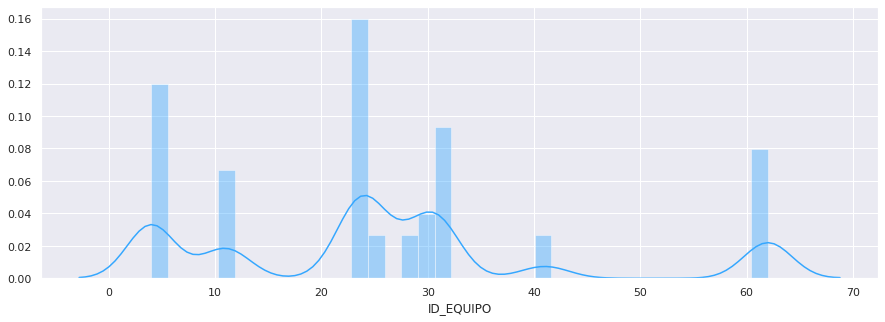

In [ ]:
sns.distplot(df['ID_EQUIPO'], color=BLUE)

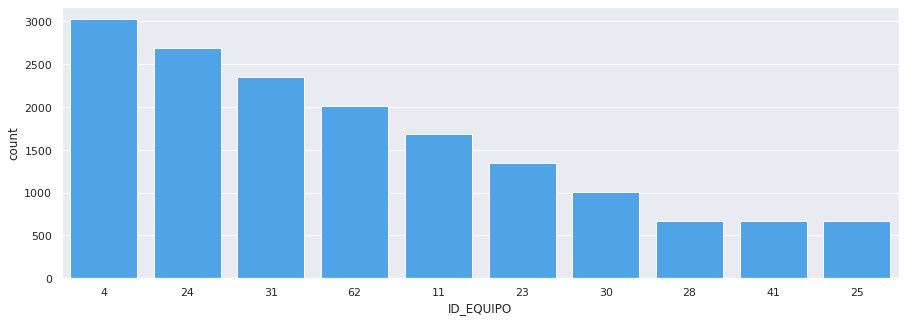

In [ ]:
order = df['ID_EQUIPO'].value_counts().index
sns.countplot(data=df, x='ID_EQUIPO', color=BLUE, order=order)

La variable encargada de identificar a los equipos numericamente, no parece tener ninguna distribucion conocida, guiandonos por su orden numerico y la cantidad de ocurrencias en la tabla.

Ordenandolos por cantidad de mediciones por equipo, tampoco vemos que se distingan grupos dentro de los equipos, asi que deducimos que no hay una relacion entre la variable ID y la cantidad de mediciones hechas.

*Consigna*

- Realizar un Análisis de Outliers (Valores Atípicos) de la variable LATENCIA_MS.


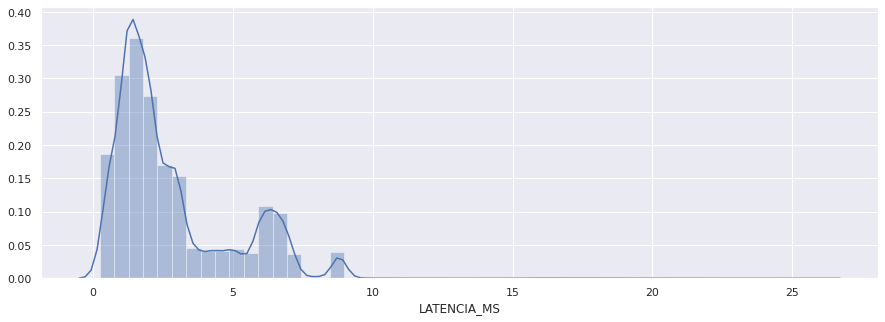

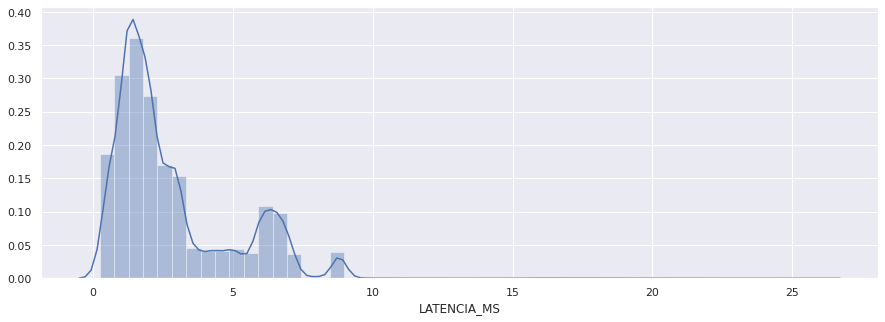

In [ ]:
sns.distplot(df["LATENCIA_MS"])

In [ ]:
nan = df["LATENCIA_MS"].isna()
nan_amount = np.count_nonzero(nan == True)
print("Hay valores nulos?", df.LATENCIA_MS.lt(0).any())
print("Hay valores negativos?", df.LATENCIA_MS.isnull().any())
print("Cantidad de valores no numericos:",nan_amount)

Hay valores nulos? False
Hay valores negativos? True
Cantidad de valores no numericos: 48
Hay valores nulos? False
Hay valores negativos? True
Cantidad de valores no numericos: 48


In [ ]:
df['LATENCIA_MS'] = df['LATENCIA_MS'].replace(np.nan, 0)
nan = df["LATENCIA_MS"].isna()
nan_amount = np.count_nonzero(nan == True)
print("Cantidad de valores no numericos:",nan_amount)

Cantidad de valores no numericos: 0
Cantidad de valores no numericos: 0


Los valores no numericos los reemplazamos por 0. 

Los valores originalmente nulos no representan un problema, puede deberse a tener el punto de medicion en la cercania del ISP.

Valores negativos no hay, lo que representaria datos corruptos.

*Consigna*
 - Elija almenos 2 PUNTO_MEDICION:

Elejimos los puntos de medicion "Carlos Paz - Cosquin" y "EDC - Capitalinas", ya que representan dos puntos de medicion con caracteristicas de trafico muy diferentes.

*Consigna*
    - ¿Cómo se comporta el trafico de entrada/salida en dicho punto de medición?

Primero analizamos como se distribuyen los valores en las mediciones.

(0.0, 10000000000.0)

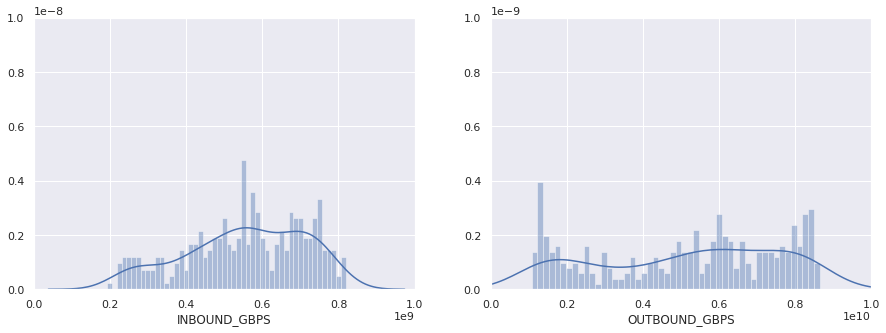

In [ ]:
plt.subplot(1,2,1)
sns.distplot(df[df.PUNTO_MEDICION == "Carlos Paz - Cosquin"].INBOUND_GBPS, bins=50)
plt.ylim((0,1e-8))
plt.xlim((0,1e9))
plt.subplot(1,2,2)
sns.distplot(df[df.PUNTO_MEDICION == "Carlos Paz - Cosquin"].OUTBOUND_GBPS, bins=50)
plt.ylim((0,1e-9))
plt.xlim((0,1e10))

Podemos observar que los valores de OUTBOUND_GBPS son un orden de magnitud mayor que los de INBOUND_GBPS

(0.0, 1e-07)

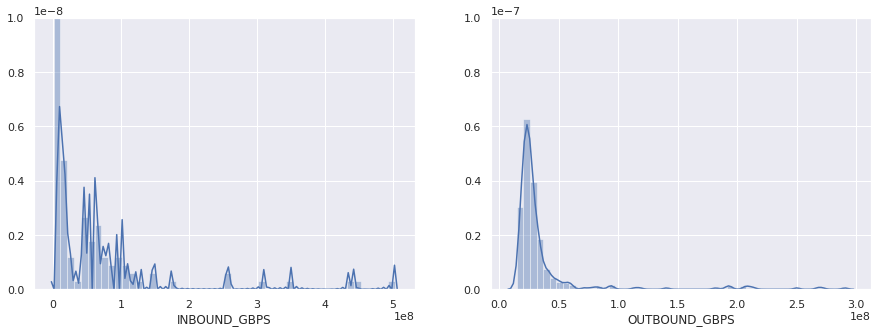

In [ ]:
plt.subplot(1,2,1)
sns.distplot(df[df.PUNTO_MEDICION == "EDC - Capitalinas"].INBOUND_GBPS, bins=50)
plt.ylim((0,1e-8))
plt.subplot(1,2,2)
sns.distplot(df[df.PUNTO_MEDICION == "EDC - Capitalinas"].OUTBOUND_GBPS, bins=50)
plt.ylim((0,1e-7))

Los valores de "EDC - Capitalinas" son mucho menores, debido seguramente a una menor cantidad de usuarios conectados al punto de medicion.

*Consigna*
- ¿Qué relaciones observamos segun el dia o la hora?

In [ ]:
mi_df = df.copy()
horas = pd.to_datetime(mi_df.FECHA_HORA, format='%H').dt.hour
mi_df["HORA_MEDICION"] = horas

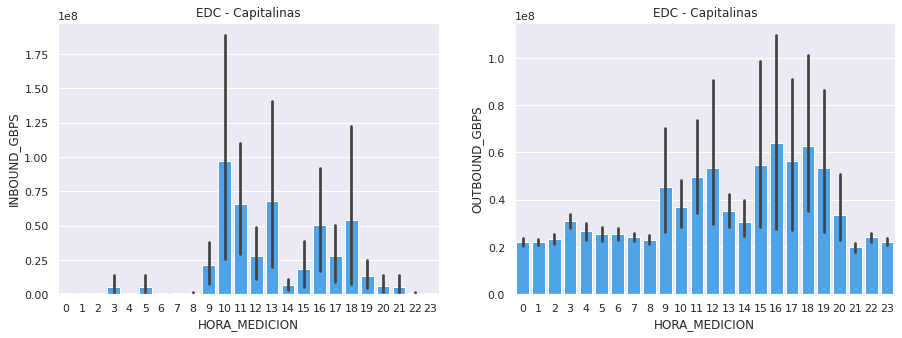

In [ ]:
capitalinas_df = mi_df[mi_df.PUNTO_MEDICION == "EDC - Capitalinas"]
plt.subplot(1,2,1)
plt.title("EDC - Capitalinas")
sns.barplot(data = capitalinas_df, x = "HORA_MEDICION", y = "INBOUND_GBPS", color=BLUE)
plt.subplot(1,2,2)
plt.title("EDC - Capitalinas")
sns.barplot(data = capitalinas_df, x = "HORA_MEDICION", y = "OUTBOUND_GBPS", color=BLUE)

En el caso de Capitalinas, vemos una presencia del trafico de bajada practicamente acotado a los horarios de oficina, con una caida al rededor de las 2, probablemente debido a la hora del almuerzo.

El trafico de subida es mas uniforme, pero se ve que en los horarios de trabajo hay mas flujo de datos.

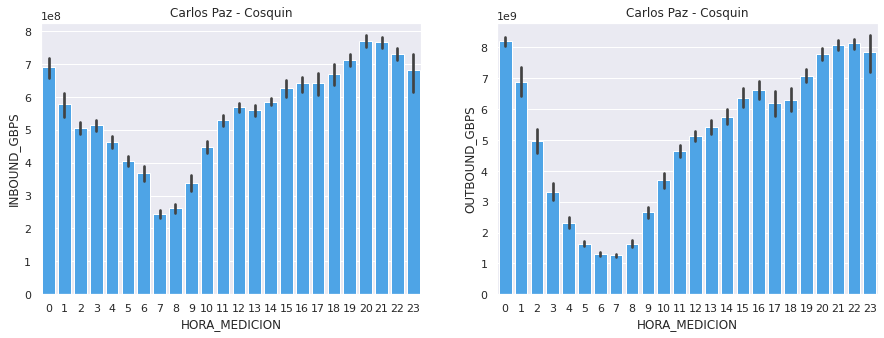

In [ ]:
carlospaz_cosquin_df = mi_df[mi_df.PUNTO_MEDICION == "Carlos Paz - Cosquin"]
plt.subplot(1,2,1)
plt.title("Carlos Paz - Cosquin")
sns.barplot(data = carlospaz_cosquin_df, x = "HORA_MEDICION", y = "INBOUND_GBPS", color=BLUE)
plt.subplot(1,2,2)
plt.title("Carlos Paz - Cosquin")
sns.barplot(data = carlospaz_cosquin_df, x = "HORA_MEDICION", y = "OUTBOUND_GBPS", color=BLUE)

Vemos que en el caso de Carlos Paz - Cosquin, la distribucion es mucho mas uniforme. Esto se debe seguramente a la mayor cantidad de usuarios de la red, lo que homogeneiza la curva. 

Se ve una caida de demanda de servicio alrededor de las 7am (tanto subida como bajada), y un pico alrededor de las 10 de la noche, lo cual es esperable ya que en dicho horario la mayor parte de la poblacion esta en su casa y puede utilizar sus conecciones domiciliarias.

VISUALIZACION DE LOS DIAS DE MEDICION

In [ ]:
mi_day = df.copy()
dias = pd.to_datetime(mi_day.FECHA_HORA, format='%d-%m-%Y').dt.date
mi_day["DIA_MEDICION"] = dias

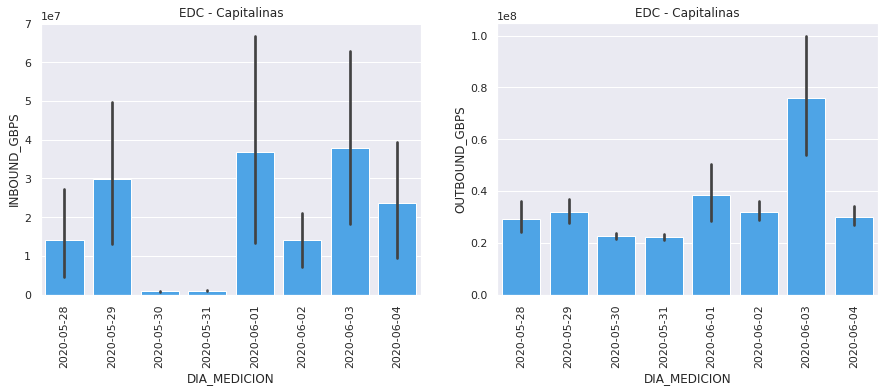

In [ ]:
capitalinas_dias_df = mi_day[mi_day.PUNTO_MEDICION == "EDC - Capitalinas"]
plt.subplot(1,2,1)
plt.title("EDC - Capitalinas")
d1 = sns.barplot(data = capitalinas_dias_df, x = "DIA_MEDICION", y = "INBOUND_GBPS", color=BLUE)
d1.set_xticklabels(d1.get_xticklabels(), rotation=90)
plt.subplot(1,2,2)
plt.title("EDC - Capitalinas")
d2 = sns.barplot(data = capitalinas_dias_df, x = "DIA_MEDICION", y = "OUTBOUND_GBPS", color=BLUE)
d2.set_xticklabels(d2.get_xticklabels(), rotation=90)
plt.show()

En la distribucion de mediciones dividido segun dia de la semana, para "EDC - Capitalinas" se puede apreciar el uso casi nulo del enlace para descargas, durante el fin de semana (dia 30 y 31). 

Si hay trafico de subida, seguramente trafico fijo de mantenimiento.

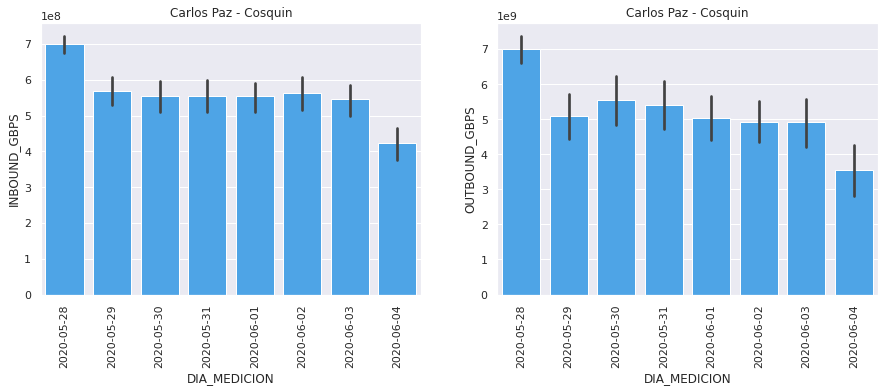

In [ ]:
carlospaz_cosquin_dias_df = mi_day[mi_day.PUNTO_MEDICION == "Carlos Paz - Cosquin"]
plt.subplot(1,2,1)
plt.title("Carlos Paz - Cosquin")
d1 = sns.barplot(data = carlospaz_cosquin_dias_df, x = "DIA_MEDICION", y = "INBOUND_GBPS", color=BLUE)
d1.set_xticklabels(d1.get_xticklabels(), rotation=90)
plt.subplot(1,2,2)
plt.title("Carlos Paz - Cosquin")
d2 = sns.barplot(data = carlospaz_cosquin_dias_df, x = "DIA_MEDICION", y = "OUTBOUND_GBPS", color=BLUE)
d2.set_xticklabels(d2.get_xticklabels(), rotation=90)
plt.show()

Para "Carlos Paz - Cosquin", una vez mas vemos una distribucion mucho mas uniforme. No parece haber grandes variaciones en relacion al dia de la semana. Solo una caida el dia Jueves 4 de Junio, y un mayor consumo el dia Jueves 28 de Mayo.

**Integrantes**: Matias Trapaglia, Fernando Fontana, Nazareno Medrano